12. Simulate a simplified version of AlexNet using Keras and demonstrate itsperformance on the CIFAR-10 dataset.

In [1]:
# ----------------------------
# 1. Import required libraries
# ----------------------------
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
# ----------------------------
# 2. Load and preprocess CIFAR-10 data
# ----------------------------
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values to [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
# ----------------------------
# 3. Define a simplified AlexNet model
# ----------------------------
model = models.Sequential([
    # Layer 1
    layers.Conv2D(96, (3,3), activation='relu', input_shape=(32,32,3), padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2), strides=2),

    # Layer 2
    layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2), strides=2),

    # Layer 3
    layers.Conv2D(384, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),

    # Layer 4
    layers.Conv2D(384, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),

    # Layer 5
    layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2), strides=2),

    # Flatten + Fully Connected Layers
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# ----------------------------
# 4. Compile the model
# ----------------------------
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [5]:
# ----------------------------
# 5. Model summary
# ----------------------------
model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 96)     │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 256)    │       221,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 384)      │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 8, 8, 384)      │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,558,794 (21.21 MB)

 Trainable params: 5,556,042 (21.19 MB)

 Non-trainable params: 2,752 (10.75 KB)

In [6]:
# ----------------------------
# 6. Train the model
# ----------------------------
history = model.fit(
    x_train, y_train,
    epochs=15,
    batch_size=128,
    validation_data=(x_test, y_test)
)

Epoch 1/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 73ms/step - accuracy: 0.2766 - loss: 2.2906 - val_accuracy: 0.1555 - val_loss: 2.8561
Epoch 2/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 46ms/step - accuracy: 0.5182 - loss: 1.3559 - val_accuracy: 0.2457 - val_loss: 2.2158
Epoch 3/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 47ms/step - accuracy: 0.6372 - loss: 1.0519 - val_accuracy: 0.6502 - val_loss: 1.0091
Epoch 4/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 48ms/step - accuracy: 0.7060 - loss: 0.8765 - val_accuracy: 0.7038 - val_loss: 0.9027
Epoch 5/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 48ms/step - accuracy: 0.7539 - loss: 0.7346 - val_accuracy: 0.6822 - val_loss: 0.9822
Epoch 6/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 47ms/step - accuracy: 0.7988 - loss: 0.6083 - val_accuracy: 0.6685 - val_loss: 0.9506
Epoch 7/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 47ms/step - accuracy: 0.8306 - loss: 0.5139 - val_accuracy: 0.7567 - val_loss: 0.7284
Epoch 8/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 47ms/step - accuracy: 0.8612 - loss: 0.4209 - 

In [7]:
# ----------------------------
# 7. Evaluate the model
# ----------------------------
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"✅ Test Accuracy: {test_acc:.4f}")

313/313 - 3s - 10ms/step - accuracy: 0.7719 - loss: 0.8702
✅ Test Accuracy: 0.7719


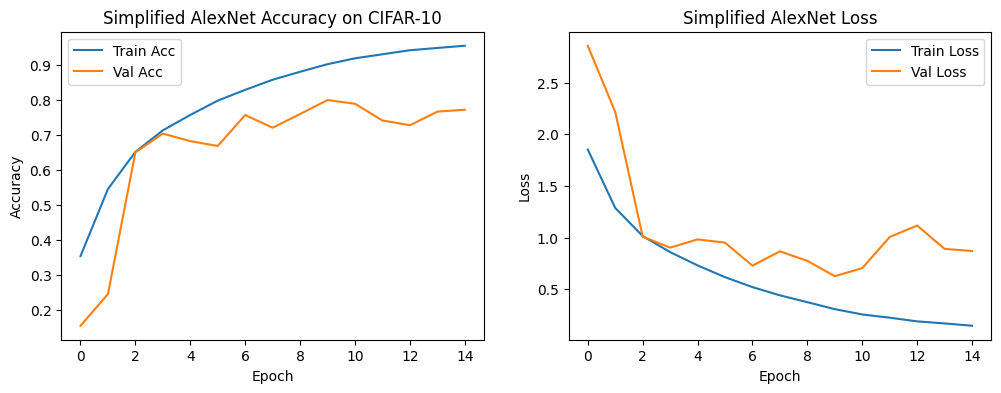

In [8]:
# ----------------------------
# 8. Plot accuracy and loss
# ----------------------------
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Simplified AlexNet Accuracy on CIFAR-10')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Simplified AlexNet Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

| Layer                    | Type                   | Output     | Description                |
| ------------------------ | ---------------------- | ---------- | -------------------------- |
| Conv2D (96 filters)      | Feature extraction     | 32×32×96   | Detects low-level features |
| MaxPool                  | Downsampling           | 16×16×96   | Reduces spatial dimensions |
| Conv2D (256 filters)     | Mid-level features     | 16×16×256  | Captures edges/textures    |
| MaxPool                  | Downsampling           | 8×8×256    | Compresses data            |
| Conv2D (384 → 384 → 256) | Deep features          | 8×8×256    | High-level abstraction     |
| MaxPool                  | Downsampling           | 4×4×256    | Final compressed map       |
| Dense(512 → 256)         | Fully connected layers | —          | Classification head        |
| Dropout                  | Regularization         | —          | Prevents overfitting       |
| Dense(10)                | Output layer           | 10 classes | Softmax probabilities      |
